Name: Dubey Aarav Shailesh        
Reg. No.: 2347114         
Adv. Python Lab 2         

In [5]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

C:\Users\daara\AppData\Local\Temp\ipykernel_4780\1816373158.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['district']):


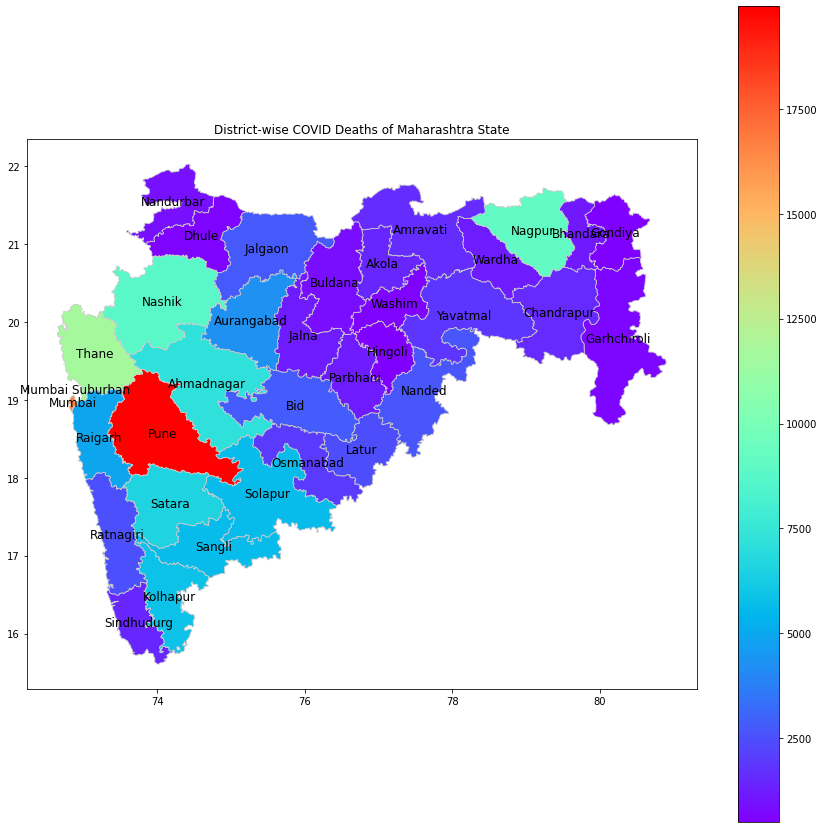

In [15]:
# Shapefile url: https://github.com/HindustanTimesLabs/shapefiles/blob/master/state_ut/maharashtra/district/
# maharashtra_district.zip
# Covid Deaths CSV url: https://www.kaggle.com/code/jillanisofttech/covid-19-cases-in-maharashtra-and-visualization/data

districts = gpd.read_file('maharashtra_district/maharashtra_district.shp')
deceased = pd.read_csv("Maharashtra Latest Covid Cases.csv")
deceased.drop(columns=['Positive Cases', 'Active Cases', 'Recovered', 'Recovery Rate (%)', 'Fatality Rate (%)'], inplace=True)
deceased.head()

merged = districts.merge(deceased, how='left', left_on='district', right_on='Districts')

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['district']):
  ax.text(x, y, label, fontsize=12, ha='center', va='center')

merged.plot(column='Deceased', cmap='rainbow', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("District-wise COVID Deaths of Maharashtra State")
plt.show()